# Introduction to Pandas

Contents:
1. Introduction to Pandas
2. Basics of Pandas
3. Pandas - Rows and Columns
4. Describing Data
5. Indexing and Slicing
6. Operations on Dataframes
7. Groupby and Aggregate Functions
8. Merging Dataframes
9. Pivot Tables

**About Pandas**
Pandas is a library specifically for data analysis, it is built using NumPy. Pandas will be extensively used for data manipulation, visualisation, building machine learning models, etc.

**Key Features of Pandas Library**
1. DataFrame - Fast and efficient objects
2. Loading data from different file formats
3. Data alignment and integrated handling of missing data
4. Reshaping and pivoting of data sets
5. Label-based slicing, indexing and subsetting
6. Mutable data structure
7. Group by functionality
8. High performance merging and joining of data
9. Direct data plotting
10. Functionality to handle Time Series



## Basics of Pandas

Pandas has two main data structures:
1. Series
2. Dataframes

**Dataframe**: It is a table with rows and columns, with rows having an index each and columns having meaningful names. There are various ways of creating dataframes, for instance, creating them from dictionaries, reading from .txt and .csv files.

**Creating dataframes from dictionaries**
If you have data in the form of lists present in python, then you can create the dataframe directly through dictionaries. The **key** in the dictionary acts as the column name and the **values** stored are the entries under the column.

In [71]:
# importing libraries 

import numpy as np
import pandas as pd

**Example 1**: Creating Dataframes using Dictionaries

In [72]:
# lists

cars_per_cap = [809, 731, 588, 18, 200, 70, 45]
country = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
drives_right = [True, False, False, False, True, True, True]

In [73]:
# converting list into dictionary

data = {"cars_per_cap": cars_per_cap, 'country': country, 'drives_right': drives_right}
data

{'cars_per_cap': [809, 731, 588, 18, 200, 70, 45],
 'country': ['United States',
  'Australia',
  'Japan',
  'India',
  'Russia',
  'Morocco',
  'Egypt'],
 'drives_right': [True, False, False, False, True, True, True]}

- To create a Dataframe from a dictionary, we can run the following command:

    `pd.DataFrame(dictionary_name)`
    

- We can also provide lists or arrays to create dataframes, but then we will have to specify the column names as shown below.

    `pd.DataFrame(list_or_array_name, columns = ['column_1', 'column_2']`

In [74]:
# converting the dictionary into dataframe
cars = pd.DataFrame(data)
cars

,cars_per_cap,country,drives_right
0,809,United States,True
1,731,Australia,False
2,588,Japan,False
3,18,India,False
4,200,Russia,True
5,70,Morocco,True
6,45,Egypt,True


In [75]:
type(cars)

pandas.core.frame.DataFrame

**Example 2**: Reading data from a file

**Creating dataframes from external files**

Another method to create dataframes is to load data from external files. Data may not necessarily be available in the form of lists. Mostly, we will have to load the data stored in the form of a CSV file, text file, etc.

In [76]:
cars_df = pd.read_csv(r"D:\Data Science\Natural Language Processing\Data Toolkit\Python for Data Science\Pandas\Upgrad Materials\Datasets\Session 2 Basics of Pandas\cars.csv")
cars_df

,USCA,US,United States,809,FALSE
0,ASPAC,AUS,Australia,731.0,True
1,ASPAC,JAP,Japan,588.0,True
2,ASPAC,IN,India,18.0,True
3,ASPAC,RU,Russia,200.0,False
4,LATAM,MOR,Morocco,70.0,False
5,AFR,EG,Egypt,45.0,False
6,EUR,ENG,England,NaN,True


**Example 3**: Column Headers (Skipping the current header)

As it can be seen that in the above dataframe the 1st row is treated as the header which needs to be removed.

In [77]:
cars_df = pd.read_csv(r"D:\Data Science\Natural Language Processing\Data Toolkit\Python for Data Science\Pandas\Upgrad Materials\Datasets\Session 2 Basics of Pandas\cars.csv",
                      header = None)
cars_df

,0,1,2,3,4
0,USCA,US,United States,809.0,False
1,ASPAC,AUS,Australia,731.0,True
2,ASPAC,JAP,Japan,588.0,True
3,ASPAC,IN,India,18.0,True
4,ASPAC,RU,Russia,200.0,False
5,LATAM,MOR,Morocco,70.0,False
6,AFR,EG,Egypt,45.0,False
7,EUR,ENG,England,NaN,True


In [78]:
# Describing columns of the dataframe

cars_df.columns = ["country code", "region", "country", "cars_per_cap", "drive_right"]

In [79]:
cars_df

,country code,region,country,cars_per_cap,drive_right
0,USCA,US,United States,809.0,False
1,ASPAC,AUS,Australia,731.0,True
2,ASPAC,JAP,Japan,588.0,True
3,ASPAC,IN,India,18.0,True
4,ASPAC,RU,Russia,200.0,False
5,LATAM,MOR,Morocco,70.0,False
6,AFR,EG,Egypt,45.0,False
7,EUR,ENG,England,NaN,True


**Example 4**(Row index/names)

Read file - skip header and assign first column as index

In [80]:
cars_df.index

RangeIndex(start=0, stop=8, step=1)

In [81]:
cars_df = pd.read_csv(r"D:\Data Science\Natural Language Processing\Data Toolkit\Python for Data Science\Pandas\Upgrad Materials\Datasets\Session 2 Basics of Pandas\cars.csv",
                      header = None, 
                      index_col = 0)
cars_df

,1,2,3,4
0,,,,
USCA,US,United States,809.0,False
ASPAC,AUS,Australia,731.0,True
ASPAC,JAP,Japan,588.0,True
ASPAC,IN,India,18.0,True
ASPAC,RU,Russia,200.0,False
LATAM,MOR,Morocco,70.0,False
AFR,EG,Egypt,45.0,False
EUR,ENG,England,NaN,True


In [82]:
cars_df.columns = ["region", "country", "cars_per_cap", "drive_right"]

In [83]:
cars_df

,region,country,cars_per_cap,drive_right
0,,,,
USCA,US,United States,809.0,False
ASPAC,AUS,Australia,731.0,True
ASPAC,JAP,Japan,588.0,True
ASPAC,IN,India,18.0,True
ASPAC,RU,Russia,200.0,False
LATAM,MOR,Morocco,70.0,False
AFR,EG,Egypt,45.0,False
EUR,ENG,England,NaN,True


In [84]:
cars_df.index

Index(['USCA', 'ASPAC', 'ASPAC', 'ASPAC', 'ASPAC', 'LATAM', 'AFR', 'EUR'], dtype='object', name=0)

**Naming the index of the dataframe**

In [85]:
cars_df.index.name = "country code"

In [86]:
cars_df

,region,country,cars_per_cap,drive_right
country code,,,,
USCA,US,United States,809.0,False
ASPAC,AUS,Australia,731.0,True
ASPAC,JAP,Japan,588.0,True
ASPAC,IN,India,18.0,True
ASPAC,RU,Russia,200.0,False
LATAM,MOR,Morocco,70.0,False
AFR,EG,Egypt,45.0,False
EUR,ENG,England,NaN,True


**Deleting the index name**

In [87]:
cars_df.index.name = None
cars_df

,region,country,cars_per_cap,drive_right
USCA,US,United States,809.0,False
ASPAC,AUS,Australia,731.0,True
ASPAC,JAP,Japan,588.0,True
ASPAC,IN,India,18.0,True
ASPAC,RU,Russia,200.0,False
LATAM,MOR,Morocco,70.0,False
AFR,EG,Egypt,45.0,False
EUR,ENG,England,NaN,True


**Set hierarchical index**: Creating multilevel indexing for a dataframe is called **hierarchical indexing**.

In [88]:
cars_df = pd.read_csv(r"D:\Data Science\Natural Language Processing\Data Toolkit\Python for Data Science\Pandas\Upgrad Materials\Datasets\Session 2 Basics of Pandas\cars.csv",header = None)

cars_df.columns = ["country code", "region", "country", "cars_per_cap", "drive_right"]
cars_df

,country code,region,country,cars_per_cap,drive_right
0,USCA,US,United States,809.0,False
1,ASPAC,AUS,Australia,731.0,True
2,ASPAC,JAP,Japan,588.0,True
3,ASPAC,IN,India,18.0,True
4,ASPAC,RU,Russia,200.0,False
5,LATAM,MOR,Morocco,70.0,False
6,AFR,EG,Egypt,45.0,False
7,EUR,ENG,England,NaN,True


In [89]:
cars_df.set_index(["region", "country code"], inplace = True)

In [90]:
cars_df

,,country,cars_per_cap,drive_right
region,country code,,,
US,USCA,United States,809.0,False
AUS,ASPAC,Australia,731.0,True
JAP,ASPAC,Japan,588.0,True
IN,ASPAC,India,18.0,True
RU,ASPAC,Russia,200.0,False
MOR,LATAM,Morocco,70.0,False
EG,AFR,Egypt,45.0,False
ENG,EUR,England,NaN,True


**Example 5**(Write Dataframe to file)

In [91]:
cars_df.to_csv('cars_to_csv.csv')

## Describing Data

**Case Study - Sales Data**

In [92]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
# Reading the dataset

sales_df = pd.read_excel(r"D:\Data Science\Natural Language Processing\Data Toolkit\Python for Data Science\Pandas\Upgrad Materials\Datasets\Session 4 Describing Data\sales.xlsx")
sales_df

,Market,Region,No_of_Orders,Profit,Sales
0,Africa,Western Africa,251,-12901.51,78476.06
1,Africa,Southern Africa,85,11768.58,51319.50
2,Africa,North Africa,182,21643.08,86698.89
3,Africa,Eastern Africa,110,8013.04,44182.60
4,Africa,Central Africa,103,15606.30,61689.99
5,Asia Pacific,Western Asia,382,-16766.90,124312.24
6,Asia Pacific,Southern Asia,469,67998.76,351806.60
7,Asia Pacific,Southeastern Asia,533,20948.84,329751.38
8,Asia Pacific,Oceania,646,54734.02,408002.98
9,Asia Pacific,Eastern Asia,414,72805.10,315390.77


**Task 1**: Read file and set 1st two column as index

In [94]:
sales_df = pd.read_excel(r"D:\Data Science\Natural Language Processing\Data Toolkit\Python for Data Science\Pandas\Upgrad Materials\Datasets\Session 4 Describing Data\sales.xlsx",
                        index_col = [0, 1])
sales_df

No_of_Orders    Profit      Sales
Market       Region                                              
Africa       Western Africa              251 -12901.51   78476.06
             Southern Africa              85  11768.58   51319.50
             North Africa                182  21643.08   86698.89
             Eastern Africa              110   8013.04   44182.60
             Central Africa              103  15606.30   61689.99
Asia Pacific Western Asia                382 -16766.90  124312.24
             Southern Asia               469  67998.76  351806.60
             Southeastern Asia           533  20948.84  329751.38
             Oceania                     646  54734.02  408002.98
             Eastern Asia                414  72805.10  315390.77
             Central Asia                 37  -2649.76    8190.74
Europe       Western Europe              964  82091.27  656637.14
             Southern Europe             338  18911.49  215703.93
             Northern Europe             367  43237.44  252969.09
             Eastern Europe              241  25050.69  108258.93
LATAM        South America               496  12377.59  210710.49
             Central America             930  74679.54  461670.28
             Caribbean                   288  13529.59  116333.05
USCA         Western US                  490  44303.65  251991.83
             Southern US                 255  19991.83  148771.91
             Eastern US                  443  47462.04  264973.98
             Central US                  356  33697.43  170416.31
             Canada                       49   7246.62   26298.81

**Task 2**: Display first 3 and last 3 rows of the sales dataframe

In [95]:
sales_df.head(3)

No_of_Orders    Profit     Sales
Market Region                                           
Africa Western Africa            251 -12901.51  78476.06
       Southern Africa            85  11768.58  51319.50
       North Africa              182  21643.08  86698.89

In [96]:
sales_df.tail(3)

No_of_Orders    Profit      Sales
Market Region                                       
USCA   Eastern US           443  47462.04  264973.98
       Central US           356  33697.43  170416.31
       Canada                49   7246.62   26298.81

**Task 3**: Display the information about the data stored in dataframe

- `dataframe.info()`: This method prints information about the dataframe which includes the index data type and column data types, the count of non-null values and the memory used.
- `dataframe.describe()` - This function produces descriptive statistics for the dataframe, that is, the central tendency(mean, median, min, max, etc.), dispersion, etc. It analyses the data and generates output for both numeric and non-numeric data types accordingly.

In [97]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23 entries, ('Africa', 'Western Africa') to ('USCA', 'Canada')
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No_of_Orders  23 non-null     int64  
 1   Profit        23 non-null     float64
 2   Sales         23 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6+ KB


**Task 4**: Display the statistical information about the data in dataframe

In [98]:
sales_df.describe()

,No_of_Orders,Profit,Sales
count,23.000000,23.000000,23.000000
mean,366.478261,28859.944783,206285.108696
std,246.590361,27701.193773,160589.886606
min,37.000000,-16766.900000,8190.740000
25%,211.500000,12073.085000,82587.475000
50%,356.000000,20948.840000,170416.310000
75%,479.500000,45882.845000,290182.375000
max,964.000000,82091.270000,656637.140000


**Task 5**: Plot a boxplot against the Sales and Profit columns

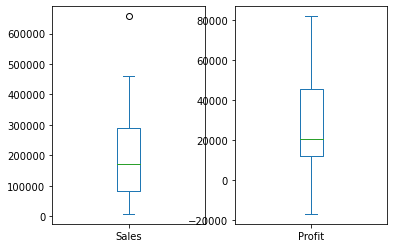

In [99]:
sales_df[['Sales', 'Profit']].plot(kind = "box", subplots = True)
plt.show()

In [100]:
sales_df['Profit']

Market        Region           
Africa        Western Africa      -12901.51
              Southern Africa      11768.58
              North Africa         21643.08
              Eastern Africa        8013.04
              Central Africa       15606.30
Asia Pacific  Western Asia        -16766.90
              Southern Asia        67998.76
              Southeastern Asia    20948.84
              Oceania              54734.02
              Eastern Asia         72805.10
              Central Asia         -2649.76
Europe        Western Europe       82091.27
              Southern Europe      18911.49
              Northern Europe      43237.44
              Eastern Europe       25050.69
LATAM         South America        12377.59
              Central America      74679.54
              Caribbean            13529.59
USCA          Western US           44303.65
              Southern US          19991.83
              Eastern US           47462.04
              Central US           33697.43


In [101]:
sales_df['Sales']

Market        Region           
Africa        Western Africa        78476.06
              Southern Africa       51319.50
              North Africa          86698.89
              Eastern Africa        44182.60
              Central Africa        61689.99
Asia Pacific  Western Asia         124312.24
              Southern Asia        351806.60
              Southeastern Asia    329751.38
              Oceania              408002.98
              Eastern Asia         315390.77
              Central Asia           8190.74
Europe        Western Europe       656637.14
              Southern Europe      215703.93
              Northern Europe      252969.09
              Eastern Europe       108258.93
LATAM         South America        210710.49
              Central America      461670.28
              Caribbean            116333.05
USCA          Western US           251991.83
              Southern US          148771.91
              Eastern US           264973.98
              Central U

## Indexing and Slicing

There are multiple ways to select rows and column from a dataframe or series. In this segment these followed will be elastrated:

- Select rows from a dataframe
- Select columns from a dataframe
- Select subsets of dataframes


**Task 5**: Sales and profit data is read in dataframe "Sales" and set 2nd column as index.

In [102]:
sales_df = pd.read_excel(r"D:\Data Science\Natural Language Processing\Data Toolkit\Python for Data Science\Pandas\Upgrad Materials\Datasets\Session 4 Describing Data\sales.xlsx",
                        index_col = [1])
sales_df

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
Southern Africa,Africa,85,11768.58,51319.50
North Africa,Africa,182,21643.08,86698.89
Eastern Africa,Africa,110,8013.04,44182.60
Central Africa,Africa,103,15606.30,61689.99
Western Asia,Asia Pacific,382,-16766.90,124312.24
Southern Asia,Asia Pacific,469,67998.76,351806.60
Southeastern Asia,Asia Pacific,533,20948.84,329751.38
Oceania,Asia Pacific,646,54734.02,408002.98


**Task 6**: Column Indexing(Display Sales column)

In [103]:
sales_df.Sales

Region
Western Africa        78476.06
Southern Africa       51319.50
North Africa          86698.89
Eastern Africa        44182.60
Central Africa        61689.99
Western Asia         124312.24
Southern Asia        351806.60
Southeastern Asia    329751.38
Oceania              408002.98
Eastern Asia         315390.77
Central Asia           8190.74
Western Europe       656637.14
Southern Europe      215703.93
Northern Europe      252969.09
Eastern Europe       108258.93
South America        210710.49
Central America      461670.28
Caribbean            116333.05
Western US           251991.83
Southern US          148771.91
Eastern US           264973.98
Central US           170416.31
Canada                26298.81
Name: Sales, dtype: float64

In [104]:
type(sales_df.Sales)

pandas.core.series.Series

**Task 7**: Display Sales and Profit column together

In [105]:
sales_df[['Sales', 'Profit']]

,Sales,Profit
Region,,
Western Africa,78476.06,-12901.51
Southern Africa,51319.50,11768.58
North Africa,86698.89,21643.08
Eastern Africa,44182.60,8013.04
Central Africa,61689.99,15606.30
Western Asia,124312.24,-16766.90
Southern Asia,351806.60,67998.76
Southeastern Asia,329751.38,20948.84
Oceania,408002.98,54734.02


**Task 8**: Display data for 'Southern Asia'

The methods used above allow us to extract columns, But how to extract a specific column from a specific row?

For that we can use the loc method to extract rows and columns from a dataframe based on the following labels:<br>
`dataframe.loc[[list_of_row_labels], [list_of_column_labels]]`

This is called **label-based indexing** over dataframes.

Another method for indexing a dataframe is the iloc method, which uses the row or column number instead of labels.<br>
`dataframe.iloc[rows, columns]`

Since positions are used instead of labels to extract values from the dataframe, the process is called **position-based indexing**.

With these two methods, we can easily extract the required entries from a dataframe based on their labels or positions. 


In [106]:
sales_df.loc[['Southern Asia'], ['Sales', 'Profit']]

,Sales,Profit
Region,,
Southern Asia,351806.6,67998.76


In [107]:
sales_df.loc['Southern Asia']

Market          Asia Pacific
No_of_Orders             469
Profit              67998.76
Sales               351806.6
Name: Southern Asia, dtype: object

**Task 9**: Display sales data for 'Southern Asia'.

In [108]:
sales_df.loc[['Southern Asia'], ['Sales']]

,Sales
Region,
Southern Asia,351806.6


In [109]:
sales_df.loc['Southern Asia', 'Sales']

351806.6

**Task 10**: Display data for Southern Asia using the iloc accessor

In [110]:
sales_df.iloc[6]

Market          Asia Pacific
No_of_Orders             469
Profit              67998.76
Sales               351806.6
Name: Southern Asia, dtype: object

**Task 11**: Display Sales data for Southern Asia

In [111]:
sales_df.iloc[6, 3] #sales

351806.6

In [112]:
sales_df.iloc[6, 2] #profit

67998.76

**Task 12**: Slicing, Display data for Market, Sales and Profit 

In [113]:
sales_df.head()

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
Southern Africa,Africa,85,11768.58,51319.50
North Africa,Africa,182,21643.08,86698.89
Eastern Africa,Africa,110,8013.04,44182.60
Central Africa,Africa,103,15606.30,61689.99


In [114]:
sales_df[['Market', 'Profit','Sales']].head()

,Market,Profit,Sales
Region,,,
Western Africa,Africa,-12901.51,78476.06
Southern Africa,Africa,11768.58,51319.50
North Africa,Africa,21643.08,86698.89
Eastern Africa,Africa,8013.04,44182.60
Central Africa,Africa,15606.30,61689.99


In [115]:
# using loc method
sales_df.loc[:, ['Market', 'Profit','Sales']].head()

,Market,Profit,Sales
Region,,,
Western Africa,Africa,-12901.51,78476.06
Southern Africa,Africa,11768.58,51319.50
North Africa,Africa,21643.08,86698.89
Eastern Africa,Africa,8013.04,44182.60
Central Africa,Africa,15606.30,61689.99


In [116]:
# using iloc method
sales_df.iloc[:, [0, 2, 3]].head()

,Market,Profit,Sales
Region,,,
Western Africa,Africa,-12901.51,78476.06
Southern Africa,Africa,11768.58,51319.50
North Africa,Africa,21643.08,86698.89
Eastern Africa,Africa,8013.04,44182.60
Central Africa,Africa,15606.30,61689.99


 **Task 13**: Display data for Western Africa, Southern Africa and North Africa

In [117]:
# using .loc method
sales_df.loc[['Western Africa', 'Southern Africa', 'North Africa']]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
Southern Africa,Africa,85,11768.58,51319.50
North Africa,Africa,182,21643.08,86698.89


In [118]:
# using .iloc method
sales_df.iloc[0:3]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
Southern Africa,Africa,85,11768.58,51319.50
North Africa,Africa,182,21643.08,86698.89


**Task 14**: Display Sales and Profit data for Western Africa Southern Africa and North Africa

In [119]:
sales_df.loc[['Western Africa', 'Southern Africa', 'North Africa'], ['Profit', 'Sales']]

,Profit,Sales
Region,,
Western Africa,-12901.51,78476.06
Southern Africa,11768.58,51319.50
North Africa,21643.08,86698.89


In [120]:
sales_df.iloc[0:3, 2:]

,Profit,Sales
Region,,
Western Africa,-12901.51,78476.06
Southern Africa,11768.58,51319.50
North Africa,21643.08,86698.89


**Task 15**: Display Markets with Sales > 3000000

In [121]:
sales_df['Market'][sales_df['Sales'] > 300000]

Region
Southern Asia        Asia Pacific
Southeastern Asia    Asia Pacific
Oceania              Asia Pacific
Eastern Asia         Asia Pacific
Western Europe             Europe
Central America             LATAM
Name: Market, dtype: object

In [122]:
sales_df[sales_df['Sales'] > 300000]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Southern Asia,Asia Pacific,469,67998.76,351806.60
Southeastern Asia,Asia Pacific,533,20948.84,329751.38
Oceania,Asia Pacific,646,54734.02,408002.98
Eastern Asia,Asia Pacific,414,72805.10,315390.77
Western Europe,Europe,964,82091.27,656637.14
Central America,LATAM,930,74679.54,461670.28


**Task 16**: Display the LATAM and European countries with sales > 250000

In [123]:
sales_df[((sales_df['Market'] == 'LATAM') | (sales_df['Market'] == 'Europe')) & (sales_df['Sales']>250000)]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Europe,Europe,964,82091.27,656637.14
Northern Europe,Europe,367,43237.44,252969.09
Central America,LATAM,930,74679.54,461670.28


In [124]:
sales_df[sales_df.Market.isin(['LATAM', 'Europe']) & (sales_df['Sales'] > 250000)]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Europe,Europe,964,82091.27,656637.14
Northern Europe,Europe,367,43237.44,252969.09
Central America,LATAM,930,74679.54,461670.28


**Task 17**: Transformation

Replace the sales values in the form of thousands

eg. - 300000 - 300K

In [125]:
sales_df.Sales = sales_df.Sales.floordiv(1000)
sales_df.head()

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78.0
Southern Africa,Africa,85,11768.58,51.0
North Africa,Africa,182,21643.08,86.0
Eastern Africa,Africa,110,8013.04,44.0
Central Africa,Africa,103,15606.30,61.0


**Task 18**: Rename the column *Sales* to *Sales_in_thousand*

In [126]:
sales_df.rename(columns= {'Sales': 'Sales in Thousand'}, inplace = True)
sales_df.head()

,Market,No_of_Orders,Profit,Sales in Thousand
Region,,,,
Western Africa,Africa,251,-12901.51,78.0
Southern Africa,Africa,85,11768.58,51.0
North Africa,Africa,182,21643.08,86.0
Eastern Africa,Africa,110,8013.04,44.0
Central Africa,Africa,103,15606.30,61.0


**Task 19**: Replace values in Profit Percent of total

In [127]:
sales_df.Profit.sum()

663778.7300000001

In [128]:
sales_df['Profit % of Total'] = sales_df['Profit']/sales_df.Profit.sum() *100

# sales_df.Profit.apply(lambda x: x/sales_df.Profit.sum()*100)

In [129]:
sales_df.head()

,Market,No_of_Orders,Profit,Sales in Thousand,Profit % of Total
Region,,,,,
Western Africa,Africa,251,-12901.51,78.0,-1.943646
Southern Africa,Africa,85,11768.58,51.0,1.772967
North Africa,Africa,182,21643.08,86.0,3.260587
Eastern Africa,Africa,110,8013.04,44.0,1.207185
Central Africa,Africa,103,15606.30,61.0,2.351130


**Task 20**: Replace negetive profits with NaN

In [130]:
sales_df.loc[sales_df['Profit']<0, 'Profit'] = np.NaN

In [131]:
sales_df.loc[sales_df['Profit']<0, 'Profit']

Series([], Name: Profit, dtype: float64)

**Task 21**: Hierarchical Indexing

Create Market and Region as multi-indexing

In [132]:
sales_df.head()

,Market,No_of_Orders,Profit,Sales in Thousand,Profit % of Total
Region,,,,,
Western Africa,Africa,251,NaN,78.0,-1.943646
Southern Africa,Africa,85,11768.58,51.0,1.772967
North Africa,Africa,182,21643.08,86.0,3.260587
Eastern Africa,Africa,110,8013.04,44.0,1.207185
Central Africa,Africa,103,15606.30,61.0,2.351130


In [133]:
# sales_df.index.name = None

In [134]:
sales_df.head()

,Market,No_of_Orders,Profit,Sales in Thousand,Profit % of Total
Region,,,,,
Western Africa,Africa,251,NaN,78.0,-1.943646
Southern Africa,Africa,85,11768.58,51.0,1.772967
North Africa,Africa,182,21643.08,86.0,3.260587
Eastern Africa,Africa,110,8013.04,44.0,1.207185
Central Africa,Africa,103,15606.30,61.0,2.351130


In [136]:
sales_df.reset_index(inplace = True)

In [137]:
sales_df.head()

,Region,Market,No_of_Orders,Profit,Sales in Thousand,Profit % of Total
0,Western Africa,Africa,251,NaN,78.0,-1.943646
1,Southern Africa,Africa,85,11768.58,51.0,1.772967
2,North Africa,Africa,182,21643.08,86.0,3.260587
3,Eastern Africa,Africa,110,8013.04,44.0,1.207185
4,Central Africa,Africa,103,15606.30,61.0,2.351130


In [140]:
sales_df.set_index(['Market', 'Region'], inplace = True)

In [141]:
sales_df.head()

No_of_Orders    Profit  Sales in Thousand  \
Market Region                                                       
Africa Western Africa            251       NaN               78.0   
       Southern Africa            85  11768.58               51.0   
       North Africa              182  21643.08               86.0   
       Eastern Africa            110   8013.04               44.0   
       Central Africa            103  15606.30               61.0   

                        Profit % of Total  
Market Region                              
Africa Western Africa           -1.943646  
       Southern Africa           1.772967  
       North Africa              3.260587  
       Eastern Africa            1.207185  
       Central Africa            2.351130

In [142]:
sales_df.sort_index().head(10)

No_of_Orders    Profit  Sales in Thousand  \
Market       Region                                                         
Africa       Central Africa              103  15606.30               61.0   
             Eastern Africa              110   8013.04               44.0   
             North Africa                182  21643.08               86.0   
             Southern Africa              85  11768.58               51.0   
             Western Africa              251       NaN               78.0   
Asia Pacific Central Asia                 37       NaN                8.0   
             Eastern Asia                414  72805.10              315.0   
             Oceania                     646  54734.02              408.0   
             Southeastern Asia           533  20948.84              329.0   
             Southern Asia               469  67998.76              351.0   

                                Profit % of Total  
Market       Region                                
Africa       Central Africa              2.351130  
             Eastern Africa              1.207185  
             North Africa                3.260587  
             Southern Africa             1.772967  
             Western Africa             -1.943646  
Asia Pacific Central Asia               -0.399193  
             Eastern Asia               10.968279  
             Oceania                     8.245823  
             Southeastern Asia           3.155997  
             Southern Asia              10.244191

**Task 22**: Display number of orders in African Market

In [147]:
sales_df.loc['Africa', :]['No_of_Orders'].sum()

731

**Pandas Series data type**

To visualise pandas series easily, it can be thought of one dimensional(1D) NumPy array with a label and an index attached to it. Unlike NumPy arrays, they can contain non-numeric data(characters, dates, time, booleans, etc.). Usually we work with series only as part of dataframes.

Syntax: `pd.Series(data, type)`

In [148]:
pd.Series([1, 2, 3, 1, 2, 3], dtype ='float')

0    1.0
1    2.0
2    3.0
3    1.0
4    2.0
5    3.0
dtype: float64

- `isin()`: Similar to the membership operator on lists, this function can check the given element "is in" the collection of elements provided.
- `isna()`: It checks wheather the given element is null/empty